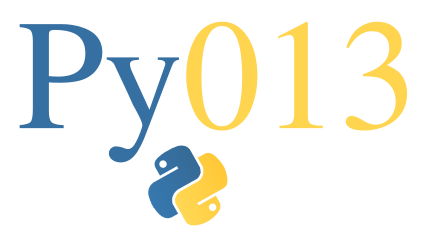

In [176]:
from IPython.core.display import Image, display
display(Image('py013_sticker.png'))

### <font color='blue'>Explorando os dados do BPC</font>

Beneficio de Progressão Continuada: https://www.inss.gov.br/beneficios/beneficio-assistencia-a-pessoa-com-deficiencia-bpc/ 

O Benefício de Prestação Continuada (BPC) da Lei Orgânica da Assistência Social (LOAS) é a garantia de um salário mínimo mensal à pessoa com deficiência que comprove não possuir meios de prover a própria manutenção, nem de tê-la provida por sua família.

### 1 - Carregando os dados

In [32]:
#Import de bibliotecas

#Pandas
import pandas as pd 

#Numpy
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Carrega dados no dataset inicial 
dados_bpc = pd.read_csv('201901_BPC.csv', sep = ';', encoding = 'latin-1', low_memory=False)

In [4]:
#Tamanho do dataset
dados_bpc.shape

(4631027, 14)

In [ ]:
#Verifica o tipo do objeto
type(dados_bpc)

In [ ]:
#Verifica a tipo das colunas do dataframe
dados_bpc.dtypes

In [ ]:
dados_bpc.head(3)

In [5]:
#Renomeia o nomes das colunas do dataset
nome_colunas = ['MÊS_COMPETÊNCIA', 'MÊS_REFERÊNCIA','UF', 'COD_MUNICIPIO', 'NM_MUNICIPIO','NIS','CPF','NM_BENEFICIARIO',
                'NIS_REPRESENTANTE','CPF_REPRESENTANTE','NM_REPRESENTANTE','NR_BENEFICIO','JUDICIALMENTE','VALOR']

In [6]:
#Carrega dados no dataset inicial 
dados_bpc = pd.read_csv('201901_BPC.csv', names = nome_colunas, sep = ';', encoding = 'latin-1', low_memory=False, header=0, dtype = {'VALOR': float }, decimal=',')

In [65]:
dados_bpc.head(3)

,MÊS_COMPETÊNCIA,MÊS_REFERÊNCIA,UF,COD_MUNICIPIO,NM_MUNICIPIO,NIS,CPF,NM_BENEFICIARIO,NIS_REPRESENTANTE,CPF_REPRESENTANTE,NM_REPRESENTANTE,NR_BENEFICIO,JUDICIALMENTE,VALOR
0,201901,201901,AC,643,ACRELANDIA,***Titular menor de 16 anos***,***Titular menor de 16 anos***,***Titular menor de 16 anos***,12611806006.00,***.063.782-**,PEDRO DANTAS DA SILVA,7030464630,NÃO,998.00
1,201901,201901,AC,643,ACRELANDIA,***Titular menor de 16 anos***,***Titular menor de 16 anos***,***Titular menor de 16 anos***,26721463073.00,NaN,ALBERTINA BEZERRA DE SOUZA,7003011647,NÃO,998.00
2,201901,201901,AC,643,ACRELANDIA,***Titular menor de 16 anos***,***Titular menor de 16 anos***,***Titular menor de 16 anos***,16804173334.00,***.503.382-**,ROSANA LIMA SOARES,5220412180,NÃO,998.00


In [6]:
#Verifica a tipo das colunas do dataframe
dados_bpc.dtypes

MÊS_COMPETÊNCIA        int64
MÊS_REFERÊNCIA         int64
UF                    object
COD_MUNICIPIO          int64
NM_MUNICIPIO          object
NIS                   object
CPF                   object
NM_BENEFICIARIO       object
NIS_REPRESENTANTE    float64
CPF_REPRESENTANTE     object
NM_REPRESENTANTE      object
NR_BENEFICIO           int64
JUDICIALMENTE         object
VALOR                float64
dtype: object

### 2- Conhecendo os dados

In [8]:
#Número de ocorrências por coluna
dados_bpc.count()

MÊS_COMPETÊNCIA      4631027
MÊS_REFERÊNCIA       4631027
UF                   4631027
COD_MUNICIPIO        4631027
NM_MUNICIPIO         4631027
NIS                  4631027
CPF                  3042382
NM_BENEFICIARIO      4631027
NIS_REPRESENTANTE    4619620
CPF_REPRESENTANTE    2924529
NM_REPRESENTANTE     4619393
NR_BENEFICIO         4631027
JUDICIALMENTE        4631027
VALOR                4631027
dtype: int64

In [9]:
#Verificar se há valores nulos na coluna CPF
dados_bpc.CPF.isnull().values.any()

True

In [10]:
#Quantidade de valores nulos
dados_bpc.CPF.isnull().sum()

1588645

In [8]:
#Remove as colunas que não serão usadas para análises.
df_bpc = dados_bpc.drop(["MÊS_REFERÊNCIA", "COD_MUNICIPIO",'NIS','CPF','NM_BENEFICIARIO','NIS_REPRESENTANTE','CPF_REPRESENTANTE','NM_REPRESENTANTE','NR_BENEFICIO'], axis=1)

In [14]:
#Verifica a tipo das colunas do dataframe
df_bpc.dtypes

MÊS_COMPETÊNCIA      int64
UF                  object
NM_MUNICIPIO        object
JUDICIALMENTE       object
VALOR              float64
dtype: object

In [15]:
df_bpc.shape

(4631027, 5)

In [17]:
#Converte a coluna para o tipo object
df_bpc['MÊS_COMPETÊNCIA'] = df_bpc['MÊS_COMPETÊNCIA'].astype('object')
df_bpc.dtypes

MÊS_COMPETÊNCIA     object
UF                  object
NM_MUNICIPIO        object
JUDICIALMENTE       object
VALOR              float64
dtype: object

In [18]:
df_bpc.head(3)

,MÊS_COMPETÊNCIA,UF,NM_MUNICIPIO,JUDICIALMENTE,VALOR
0,201901,AC,ACRELANDIA,NÃO,998.00
1,201901,AC,ACRELANDIA,NÃO,998.00
2,201901,AC,ACRELANDIA,NÃO,998.00


### 3 - Análises dos dados

In [15]:
# Quantidade de Beneficios por estado
bpc_uf = df_bpc.groupby(['UF'])
total_uf = bpc_uf.size()
total_uf.sort_values(ascending = False)

UF
SP    746620
MG    465668
BA    449389
RJ    338231
PE    312926
CE    270880
PA    211999
PR    209807
RS    200704
MA    192226
GO    155480
PB    114873
AL    114243
AM    103543
RN     84350
MS     83944
MT     83593
SC     77687
PI     77268
ES     72442
SE     61527
DF     55014
RO     45032
TO     38889
AP     25851
AC     25752
RR     13089
dtype: int64

In [40]:
# Quantidade de estados brasileiros com BPC
len(bpc_uf.groups)

,VALOR
count,4631027.00
mean,998.00
std,0.73
min,333.33
25%,998.00
50%,998.00
75%,998.00
max,1325.34


In [137]:
#Valor consolidado por UF
df_ufValor = df_bpc['VALOR'].groupby(df_bpc['UF'])  
df_ufValor.sum().sort_values(ascending = False)

UF
SP   745128111.70
MG   464737084.16
BA   448491373.77
RJ   337554969.76
PE   312300401.47
CE   270339412.89
PA   211575497.99
PR   209386725.14
RS   200302510.60
MA   191841630.15
GO   155169741.09
PB   114643805.74
AL   114014807.86
AM   103335882.37
RN    84181420.38
MS    83776689.89
MT    83428242.43
SC    77532482.66
PI    77113506.30
ES    72297300.57
SE    61403985.04
DF    54904097.30
RO    44941908.56
TO    38811273.78
AP    25799323.98
AC    25700895.06
RR    13062837.74
Name: VALOR, dtype: float64

In [130]:
# Coletando estatísticas das colunas númericas
df_bpc.describe()

,MÊS_COMPETÊNCIA,VALOR
count,4631027.00,4631027.00
mean,201901.00,998.00
std,0.00,0.73
min,201901.00,333.33
25%,201901.00,998.00
50%,201901.00,998.00
75%,201901.00,998.00
max,201901.00,1325.34


In [86]:
#Número de Beneficios que entram ou não por via judicial
df_jud = df_bpc['JUDICIALMENTE'].value_counts()
df_jud

NÃO    4163401
SIM     467626
Name: JUDICIALMENTE, dtype: int64

In [120]:
#Menor valor de beneficio 
df_min = df_bpc[df_bpc['VALOR'] <= 400]
df_min.head(3)

,MÊS_COMPETÊNCIA,UF,NM_MUNICIPIO,JUDICIALMENTE,VALOR
3531700,201901,RS,CANDIDO GODOI,SIM,333.33


In [ ]:
#Beneficios maiores que R$1200,00 
df_min = df_bpc[df_bpc['VALOR'] > 1200]
df_min

In [171]:
#Valor para a cidade de Santos
df_santos = df_bpc[df_bpc['NM_MUNICIPIO'] == 'SANTOS']
df_santos.VALOR.sum()

4590802.07

In [174]:
#Quantidade de Beneficios
df_santos['NM_MUNICIPIO'].value_counts()

SANTOS    4600
Name: NM_MUNICIPIO, dtype: int64

In [184]:
#df_bpc['REGIÃO'] = np.where(df_bpc['NM_MUNICIPIO'].isin(['SANTOS','PRAIA GRANDE','GUARUJA','CUBATÃO']),'BAIXADA SANTISTA', 'BRASIL')

In [186]:
#df_baixada = df_bpc[df_bpc['REGIÃO'] == 'BAIXADA SANTISTA']
#df_baixada

#df_baixada_agg = df_baixada['VALOR'].groupby(df_baixada['NM_MUNICIPIO'])  
#df_baixada_agg.sum()

### 4- Gráficos

In [121]:
x2 = ['NÃO', 'SIM']
y2 = df_jud

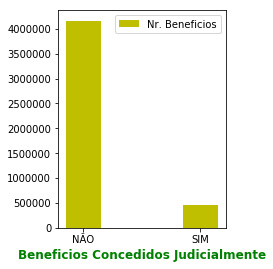

In [129]:
#plt.barh(x, y, label = 'Barras1', color = 'r')
plt.figure(figsize = (3, 4))
plt.bar(x2, y2, label = 'Nr. Beneficios', color = 'y', width = 0.3)
plt.xlabel('Beneficios Concedidos Judicialmente', fontweight='bold', color = 'green', fontsize='12', horizontalalignment='center')
plt.legend()
plt.show()

Matplotlib: https://matplotlib.org/3.1.1/gallery/index.html

Seaborn: https://seaborn.pydata.org/examples/index.html